# 3.2 Continuity & Differentiation

<a target="_blank" href="https://colab.research.google.com/github/SaajanM/mat422-homework/blob/main/3.2%20Continuity%20and%20Differentiation/continuity_diff.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

In [ ]:
# Install a numpy package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib

In [2]:
# Import the numpy package
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

$\newcommand\norm[1]{\left\lVert#1\right\rVert}$
$\newcommand\argmax{\text{arg}\,\text{max}}$
$\newcommand\argmin{\text{arg}\,\text{min}}$

## Section 3.2.1 Limits & Continuity

Before we begin discussing limits and continuity in a formal manner, we must first discuss definitions. In this discussion we are going to be restricting our metric to the euclidean norm $\norm{\mathbb{x}}=\sqrt{\sum_{i=1}^d x_i^2}$ for $\mathbf{x}$ a $d$ dimensional column vector in the reals.

We define the **open $\mathbf{r}$-ball** (denoted $B_r(\mathbf{x})$) around $\mathbf{x}\in\mathbb{R}^d$ to be the set of points within the distance $r$ of $\mathbf{x}$. That is:
$$
B_r(\mathbf{x}) = \left\{\mathbf{y}\in\mathbb{R}^d:\norm{\mathbf{y}-\mathbf{x}} < r\right\}
$$

Now we define $\mathbf{x}$ to be a **limit point** of a set $A\subseteq\mathbb{R}^d$ if every open ball around $\mathbf{x}$ contains a point $\mathbf{a}\in A$ such that $\mathbf{x}\neq\mathbf{a}$. $A$ is then called **closed** if all of its limit points belong to it. It is called **open** if for all points in $A$, there exists a ball around the point that is completely enclosed within $A$. Finally, it is called **bounded** if there exists an $r>0$ such that the $r$-ball around the zero vector fully contains $A$.

**Definition:** The **limit** $L$ of a function $f:D\to\mathbb{R}$ (with $D\subseteq\mathbb{R}^d$) as $\mathbf{x}$ approaches $\mathbf{a}$ if for any $\varepsilon > 0$, there exists a $\delta > 0$, such that $\norm{f(\mathbf{x}) - L} < \varepsilon$ for all $\mathbf{x}\in D\cap B_{\delta}(\mathbf{a}) \backslash \{\mathbf{a}\}$. We denote this all as 
$$
\lim_{\mathbf{x}\to\mathbf{a}} f(\mathbf{x}) = L
$$

Now we can discuss continuous functions. These functions have very nice properties (ie. Intermediate Value Theorem) so it is useful to understand how they work.

A function $f:D\to\mathbb{R}$ (with $D\subseteq\mathbb{R}^d$) is **continuous** at $\mathbf{a}$ if $\lim_{\mathbf{x}\to\mathbf{a}} f(\mathbf{x}) = f(\mathbf{a})$

If we have $f$ being continutious at $\mathbf{x}$ and $g$ being continuous at $f(\mathbf{x})$ then we can conclude that $g\circ f$ is continuous at $\mathbf{x}$.

We assert without proof the extreme value theorem. That is, if $f$ is a continuous function on a closed, nonempty, bounded domain, then it attains a minimum and a maximum.

## Section 3.2.2 Derivatives

Derivatives are useful in determining the instantaneous rate of change at a point. This has wide reaching applications in regards to fluid dynamics, mechanical simulations, and machine learning.

### Section 3.2.2.1 Functions on a Single Variable

We define the derivative of a function $f:D\to\mathbb{R}$ at an interior point of $D$, $x_0$ to be:
$$
f'(x_0) =\frac{\text{d}f(x_0)}{\text{d}x} = \lim_{h\to 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$,
provided the limit exist.

We assert without proof that the derivative is a linear operator.

We discussed extreme values above, but we dont really know where to find them. The following gives a hint as to where to find them.

If $f'(x_0) > 0$ then there exists an open ball $B_\delta(x_0)$ such that for all $x$ within, we have that $x > x_0\implies f(x) > f(x_0)$ and $x < x_0\implies f(x) < f(x_0)$. If $f'(x_0)$ was negative, then the opposite holds.

This gets us tantalizingly close to the mean value theorem, just in the opposite direction.

We assert without proof Rolle's Theorem: If a continuous $f$ has a derivative on $(a,b)$, then we know that if $f(a) = f(b)$ then there exists a $c\in (a,b)$ such that $f'(c)=0$.

This leads us to the MVT: If a continuous $f$ has a derivative on $(a,b)$ then there exists a $a<c<b$ such that
$$
f'(c) = \frac{f(b)-f(a)}{b-a}
$$

### Section 3.2.2.1 Functions on Many Variables

Very rarely in data science are functions of a single variable.

Here we introduce the **partial derivative**. This measures the derivative in one variable at a time. Mathematically, the formula is identical to the single valued expression, just with $h$ multiplied against the unit vector in the variable we are measuring.

If instead we look at a general unit direction vector and not a unit basis vector we end up with a **directional derivative**.

Now we define the **Jacobian** of $f$ as $\mathbf{J}_f(\mathbf{x}_0)=\nabla f(\mathbf{x}_0)^T$ where $\nabla f(\mathbf{x}_0)$ is the **gradient** of $f$ and is the column vector of all the partial derivatives.

A directional derivative can be made by multiplying a unit vector against the Jacobian.

We can also take higher order derivatives. To assist in this we can take the Jacobian of the gradient. This yeilds the **Hessian** matrix, which is naught but a vertical stack of all the jacobians of the partial derivatives of $f$. The Hessian matrix is symmetric because switching the order of taking partial derivatives yields the same result.

If we can apply this to a function $f$ we say $f$ is twice continuously differentiable.

## Section 3.2.3 Taylors Theorem

Many functions that are interesting are rediculously computationally intensive. We can use Taylor expansions to estimate these functions in an accurate manner.

We skip the single variable taylor approximation because it is relatively straightforward and is found in many calculus classes. For the multivariate we limit ourselves to a quadratic approximation.

Let $f: D\to \mathbb{R}$ where $D\subseteq\mathbb{R}^d$. Let $\mathbf{x}_0\in D$ and $\delta > 0$ be such that $B_\delta(\mathbf{x}_0)\subseteq{D}$. Suppose $f$ is three times continuously differentiable on $B_\delta(\mathbf{x}_0)$. Then for any $\mathbb{x}\in B_\delta(\mathbf{x}_0)$, let $\mathbf{p} = \mathbf{x}-\mathbf{x}_0$. Now we define the **taylor approximation** of $f(\mathbb{x})$ as

$$
f(\mathbb{x}) = f(\mathbb{x}_0) + \mathbf{J}_f(\mathbf{x}_0)\mathbf{p} + \frac{1}{2}\mathbf{p}^T\mathbf{H}_f(\mathbf{x}_0)\mathbf{p} + O(\norm{\mathbf{p}^3})
$$

The last term is a cubic error term with respect to the distance from $\mathbf{x}_0$ that $\mathbf{x}$ is.

Below is code showing how to perform a taylor expansion in `scipy`.

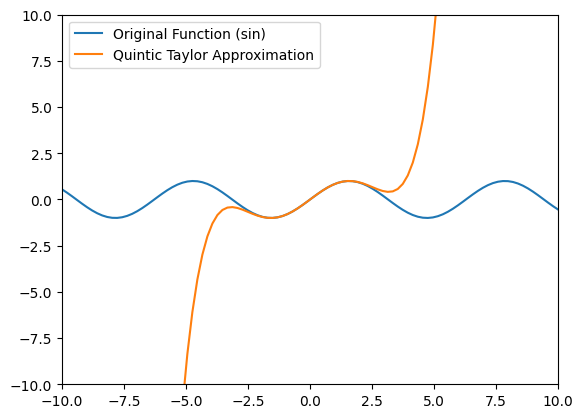

In [11]:
x = np.linspace(-10.0, 10.0, num=100)

plt.plot(x, np.sin(x), label="Original Function (sin)")

sin_taylor = interpolate.approximate_taylor_polynomial(np.sin, 0, 5, 1)

plt.plot(x, sin_taylor(x), label=f"Quintic Taylor Approximation")

plt.legend()
plt.axis([-10, 10, -10, 10])
plt.show()